In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from stop_dependence import impurity_decrease_accuracy_dependence, samples_split_accuracy_dependence, \
depth_accuracy_dependence

In [2]:
# Чтение данных из файла и подготовка данных
train_data = pd.read_csv('datasets/Titanic_train.csv', sep=',', header=0, index_col=0)
X_test_data = pd.read_csv('datasets/Titanic_X_test.csv', sep=',', header=0, index_col=0)
y_test_data = pd.read_csv('datasets/Titanic_y_test.csv', sep=',', header=0, index_col=0)
train_data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
train_data.replace({'Embarked': {'C': 0, 'Q': 1, 'S': 2}}, inplace=True)
train_data.fillna(0, inplace=True)
X_test_data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
X_test_data.replace({'Embarked': {'C': 0, 'Q': 1, 'S': 2}}, inplace=True)
X_test_data.fillna(0, inplace=True)
y_train_data = train_data['Survived']
X_train_data = train_data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test_data = X_test_data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# y = train_data['Survived']
# X = train_data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train_data, y_train_data)
print('train score: {}'.format(clf.score(X_train_data, y_train_data)))
print('test score: {}'.format(clf.score(X_test_data, y_test_data)))

train score: 0.9820426487093153
test score: 0.7799043062200957


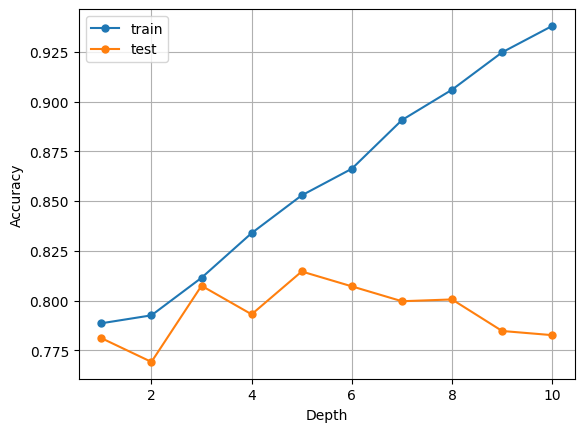

In [4]:
# Останов по высоте 3-4
plt.xlabel('Depth')
plt.ylabel('Accuracy')
depth_train_dep, depth_test_dep = depth_accuracy_dependence(X_train_data, y_train_data)
plt.plot(depth_train_dep, label='train',
marker='.', markersize=10)
plt.plot(depth_test_dep, label='test',
marker='.', markersize=10)
plt.grid()
plt.legend()
plt.show()

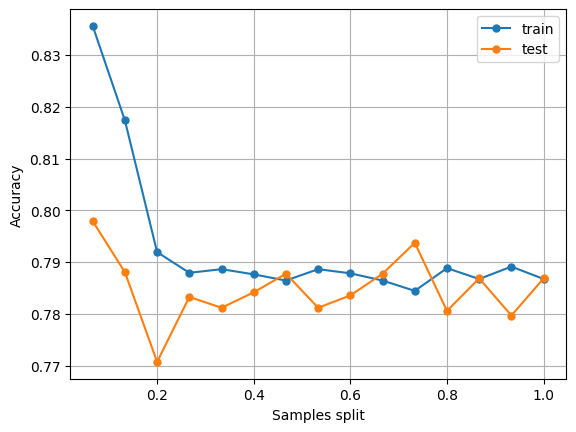

In [5]:
# Останов по числу объектов 0.2
plt.xlabel('Samples split')
plt.ylabel('Accuracy')
samples_split_train_dep, samples_split_test_dep = samples_split_accuracy_dependence(X_train_data, y_train_data)
plt.plot(samples_split_train_dep, label='train',
marker='.', markersize=10)
plt.plot(samples_split_test_dep, label='test',
marker='.', markersize=10)
plt.grid()
plt.legend()
plt.show()

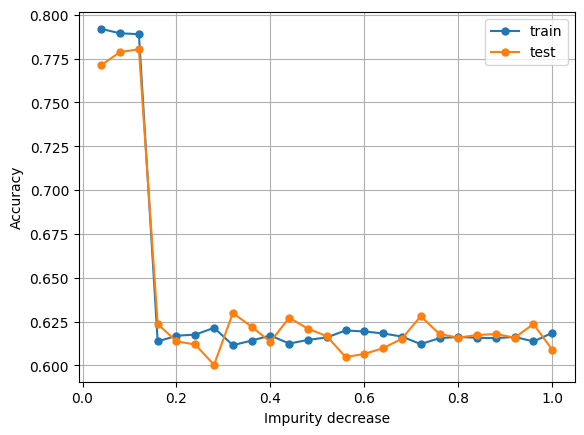

In [6]:
# Останов по проценту примеси(по ошибке классификации) 0.05-0.1
plt.xlabel('Impurity decrease')
plt.ylabel('Accuracy')
impurity_decrease_train_dep, impurity_decrease_test_dep = impurity_decrease_accuracy_dependence(X_train_data, y_train_data)
plt.plot(impurity_decrease_train_dep, label='train',
marker='.', markersize=10)
plt.plot(impurity_decrease_test_dep, label='test',
marker='.', markersize=10)
plt.grid()
plt.legend()
plt.show()

In [27]:
# With optimal parameters
clf_impurity = DecisionTreeClassifier(min_samples_split=0.1,
min_impurity_decrease=0.01)
clf_impurity.fit(X_train_data, y_train_data)
print('train score: {}'.format(clf_impurity.score(X_train_data, y_train_data)))
print('test score: {}'.format(clf_impurity.score(X_test_data, y_test_data)))
labels = np.array(clf.predict(X=X_test_data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]))
label0 = np.count_nonzero(labels == 0)
print("Утонувшие {}".format(str(label0)))
print("Выжившие {}".format(str(X_test_data.index.size - label0)))

train score: 0.8103254769921436
test score: 0.9856459330143541
Утонувшие 256
Выжившие 162


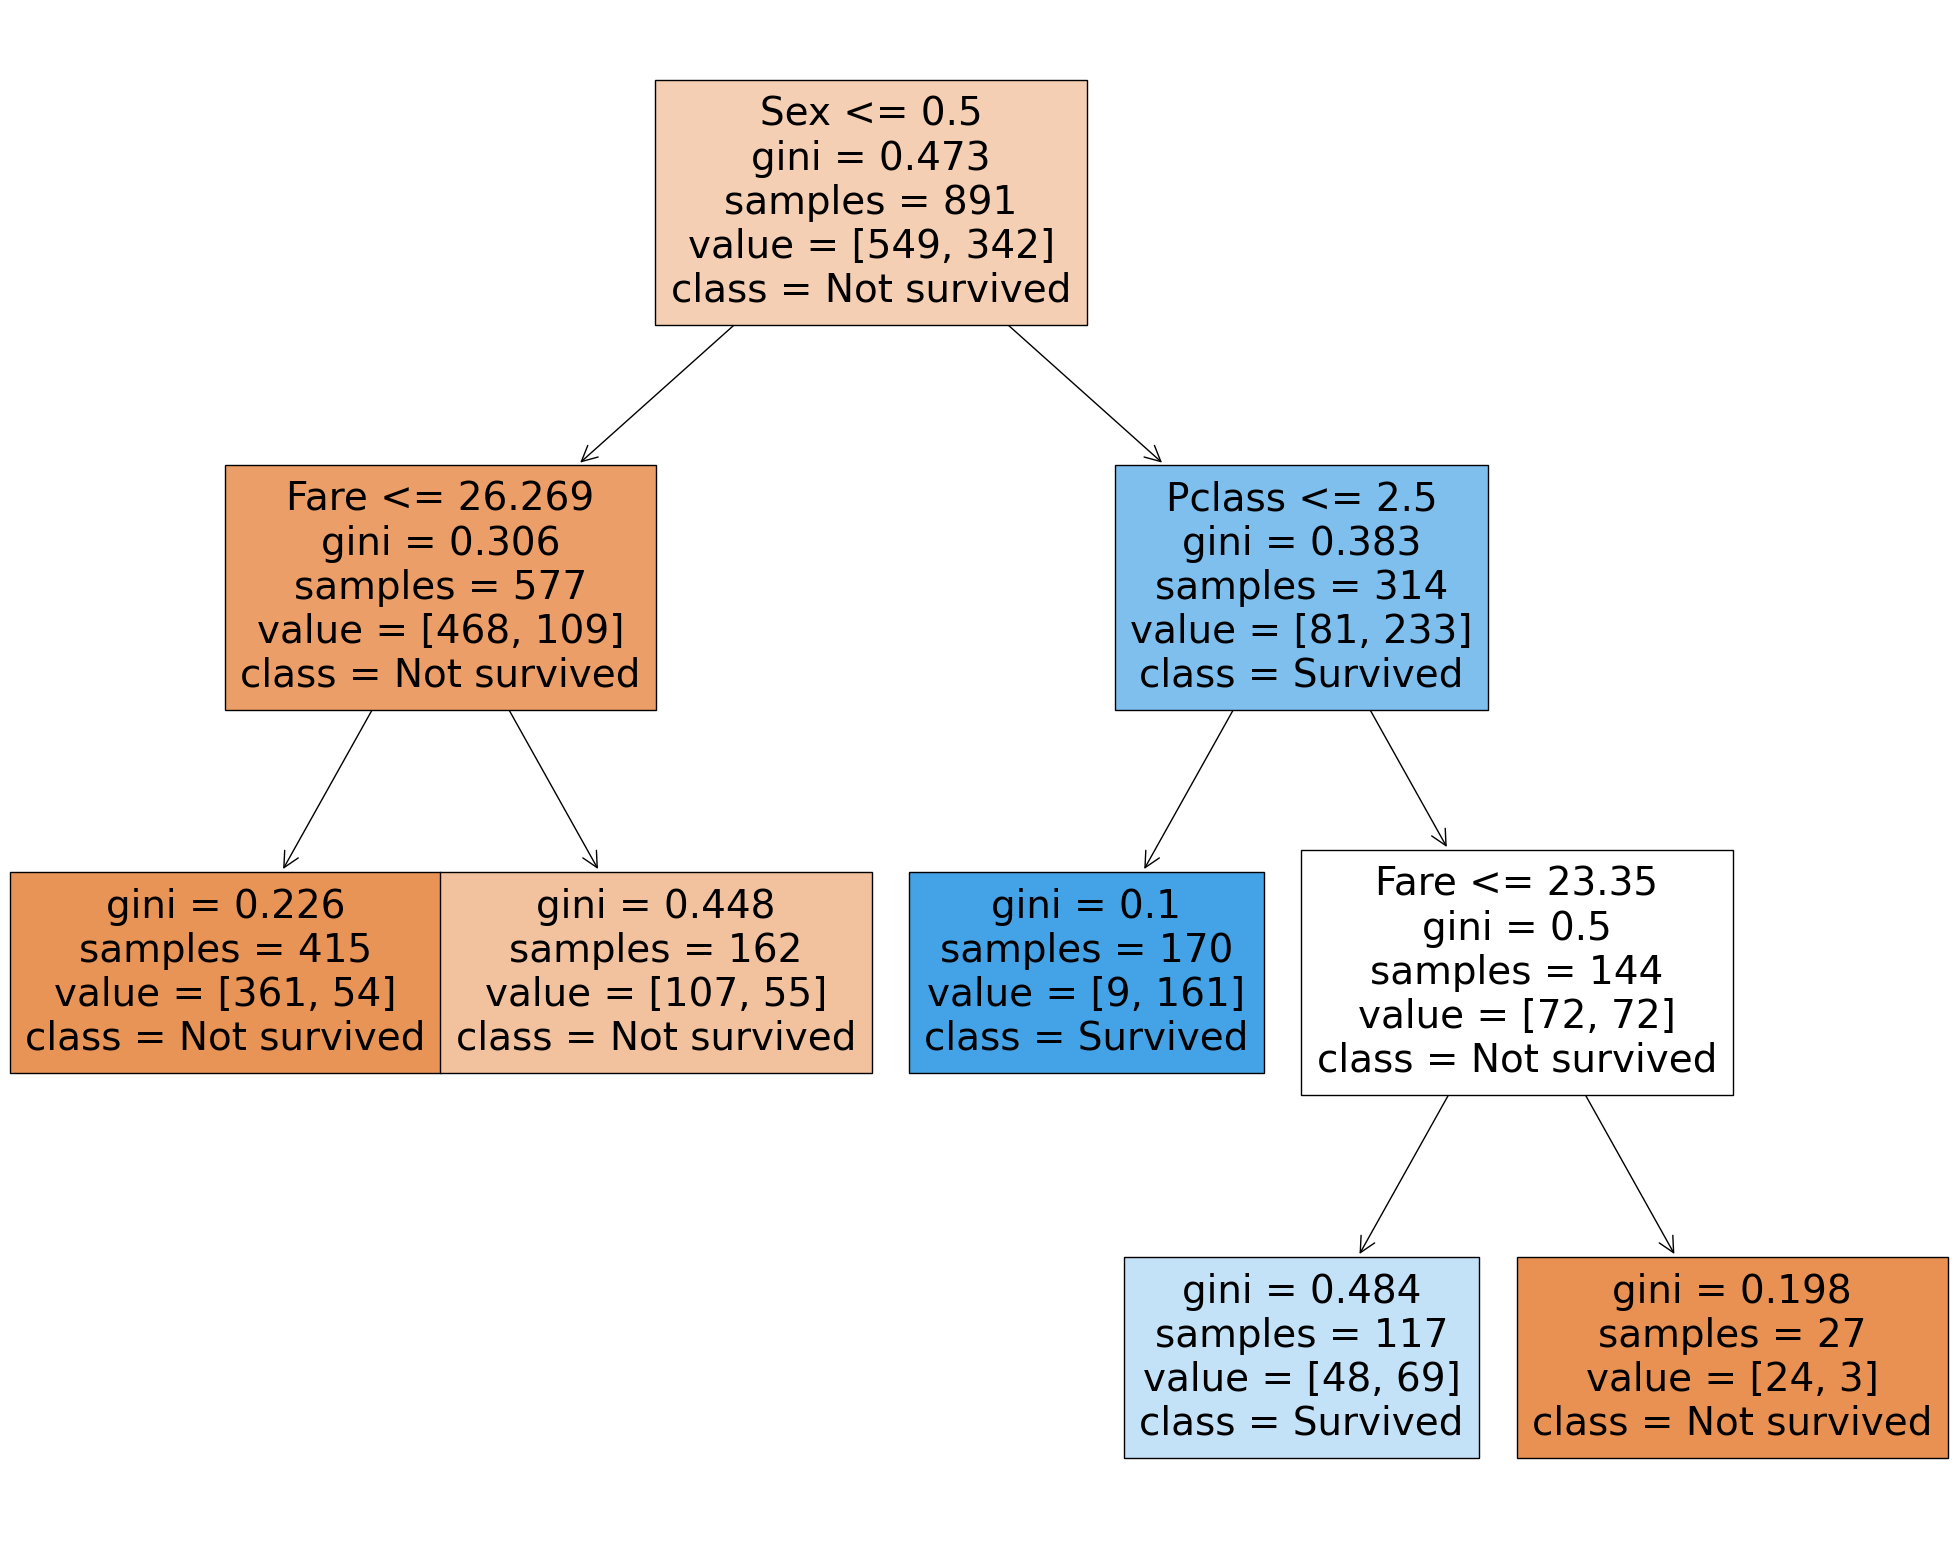

In [28]:
# Отображение дерева
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(clf_impurity,
feature_names=X_train_data.columns,
class_names=['Not survived', 'Survived'],
filled=True)
fig.savefig('graphs/titanic_improved.pdf', dpi=1000)